# EXPLORATORY DATA ANALYSIS
- Number of Rows
- Number of Columns
- Shape of the data
- Numerical and Categorical Variable
- Missing Values
- Outliers(Skewed Data)
- Profiling the Data
- Statistical Analysis
- Graph Based Analysis
    1. Univariate Analysis
    2. Bivariate Analysis
    3. Multivariate Analysis

# Black Friday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"blackFriday_train.csv")

In [3]:
data_copy=data

In [4]:
# I have made a Copy of the dataset so i can refer the original dataset whenever I needed to distinguish and clean the records

### Profile of the data

In [5]:
data_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Feature Types

In [6]:
data_copy.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
# Observation:
#     There are five features with object type,five features with int type and two features with float type 

### Shape of Data

In [8]:
data_copy.shape

(550068, 12)

In [9]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Missing Values

In [10]:
data_copy.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
# Observation:
#     There are 173638 null values in Product_Category_2 and 383247 null values in Product_Category_3  
#     Which needs to be handled through Feature Engineering 

In [12]:
data_col=data_copy[data_copy.dtypes[data_copy.dtypes=='object'].index]

In [13]:
data_num=data_copy[data_copy.dtypes[data_copy.dtypes!='object'].index]

### Numerical Features

In [14]:
data_num.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


### Categorical Features

In [15]:
data_col.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [16]:
# Observation:
#     Some Features like Stay_In_Current_City_Years and Age should be preprocessed to int type 
#     as it belongs to int type

### Unique Values in Stay In Current City Years

In [17]:
data_copy['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
# Observation:
#     There are five unique values in that '4+' should be handled so I can make this feature as int type

In [19]:
data_copy['Stay_In_Current_City_Years']=data_copy['Stay_In_Current_City_Years'].str.replace("+","")

In [20]:
# Replacing all the records which has "+" with empty string

In [21]:
data_copy['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

### Changing the Stay_In_Current_City_Years type to int

In [22]:
data_copy['Stay_In_Current_City_Years']=data_copy['Stay_In_Current_City_Years'].astype('int')

In [23]:
data_copy['Stay_In_Current_City_Years'].dtype

dtype('int32')

In [24]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 48.3+ MB


### Unique Records in Age Feature

In [25]:
data_copy['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
ls=['0-17', '26-35', '46-50', '51-55', '36-45', '18-25']
cols=['Age']
for item in ls:
    for i in cols:
        data_copy[i]=data_copy[i].str.replace(item,item[-2:])

In [27]:
# Observation:
#      replacing all the records with last two character of the feature

In [28]:
data_copy['Age'].unique()

array(['17', '55+', '35', '50', '55', '45', '25'], dtype=object)

In [29]:
data_copy['Age']=data_copy['Age'].str.replace("+","")

In [30]:
# Observation:
#     replacing all the records which has '+' with empty string

In [31]:
data_copy['Age'].unique()

array(['17', '55', '35', '50', '45', '25'], dtype=object)

### Changing Age Feature to int type

In [32]:
data_copy['Age']=data_copy['Age'].astype("int")

In [33]:
data_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969


In [34]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 46.2+ MB


In [35]:
data_num=data_copy[data_copy.dtypes[data_copy.dtypes!='object'].index]

In [36]:
data_col=data_copy[data_copy.dtypes[data_copy.dtypes=='object'].index]

### Statistical Analysis Of Numerical Features

In [37]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Age,550068.0,3.812199e+01,9.979704,17.0,35.0,35.0,45.0,55.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Stay_In_Current_City_Years,550068.0,1.858418e+00,1.289443,0.0,1.0,2.0,3.0,4.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [38]:
# Observation:
#     It gives minimum,25,50,75,100 percentiles of the numerical records
#     Purchase feature is left skewed as minimum value and 25% varies a lot from 12.0->5823
#     It also have higher standard deviation so dispersion is larger

### Statistical Analysis Of Categorical Features

In [39]:
data_col.describe()

,Product_ID,Gender,City_Category
count,550068,550068,550068
unique,3631,2,3
top,P00265242,M,B
freq,1880,414259,231173


In [40]:
# Observation:
#     In Gender feature,The most frequent records are Male and has frequency of 414258
#     In City Category,There are three unique records where 'B' has most Frequent occuring has 231173 

### Correlation of the Data

In [41]:
data_num.corr()

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.043190,-0.023971,-0.030737,0.020443,0.003825,0.001529,0.003419,0.004716
Age,0.043190,1.000000,0.096812,-0.002128,0.312095,0.059216,0.055319,0.057713,0.016670
Occupation,-0.023971,0.096812,1.000000,0.030005,0.024280,-0.007618,-0.000384,0.013263,0.020833
Stay_In_Current_City_Years,-0.030737,-0.002128,0.030005,1.000000,-0.012819,-0.004213,-0.001657,0.002093,0.005422
Marital_Status,0.020443,0.312095,0.024280,-0.012819,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,0.059216,-0.007618,-0.004213,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,0.055319,-0.000384,-0.001657,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.057713,0.013263,0.002093,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.016670,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [42]:
# Observation:
#     Purchase column is the dependent feature.User_ID and Marital_Status are less
#     Correlated with the purchase column 

### Covariance of the Data

In [43]:
data_num.cov()

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,2.984573e+06,744.632501,-270.113921,-68.470253,17.367619,26.008008,13.461964,24.439292,4.092159e+04
Age,7.446325e+02,99.594494,6.301908,-0.027380,1.531676,2.326150,2.807842,2.369118,8.356607e+02
Occupation,-2.701139e+02,6.301908,42.545100,0.252356,0.077882,-0.195578,-0.012700,0.354959,6.825547e+02
Stay_In_Current_City_Years,-6.847025e+01,-0.027380,0.252356,1.662662,-0.008129,-0.021384,-0.010846,0.011092,3.511996e+01
Marital_Status,1.736762e+01,1.531676,0.077882,-0.008129,0.241838,0.038497,0.037819,0.039400,-1.144629e+00
Product_Category_1,2.600801e+01,2.326150,-0.195578,-0.021384,0.038497,15.493760,9.044359,2.438836,-6.795650e+03
Product_Category_2,1.346196e+01,2.807842,-0.012700,-0.010846,0.037819,9.044359,25.873394,10.092953,-5.538125e+03
Product_Category_3,2.443929e+01,2.369118,0.354959,0.011092,0.039400,2.438836,10.092953,17.018411,-4.613754e+02
Purchase,4.092159e+04,835.660700,682.554656,35.119961,-1.144629,-6795.650007,-5538.125114,-461.375426,2.523119e+07


### Memory Consumed

In [44]:
data_copy.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           2200272
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    2200272
Marital_Status                4400544
Product_Category_1            4400544
Product_Category_2            4400544
Product_Category_3            4400544
Purchase                      4400544
dtype: int64

### Skewness Of the Data

In [45]:
data_copy.skew()

User_ID                       0.003066
Age                           0.048869
Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category_1            1.025735
Product_Category_2           -0.162758
Product_Category_3           -0.765446
Purchase                      0.600140
dtype: float64

In [46]:
# Observation:
#     It shows that the Product_Category_3 feature is left skewed distributed
#     and the purchase feature is right skewed distributed.

<AxesSubplot:xlabel='Product_Category_3', ylabel='Density'>

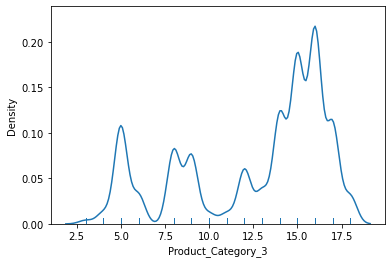

In [47]:
sns.distplot(data_copy['Product_Category_3'], rug=True, hist=False)

In [48]:
# Observation:
#     It Shows that the Product_Category_3 has left skewed distribution
#     It needs to be processed to manage the outliers

In [49]:
data_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969


### Find out the number of Puchase made based on the Gender

In [50]:
data_copy.groupby("Gender").count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,135809,135809,135809,135809,135809,135809,135809,135809,91530,37594,135809
M,414259,414259,414259,414259,414259,414259,414259,414259,284900,129227,414259


In [51]:
# Observation:
#     It seems that Male has purchase more items compared to Female

### Which Gender made the highest average Purchase

In [52]:
data_copy.groupby("Gender").mean()['Purchase']

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [53]:
# Observation:
#     The Average Purchase of Male is greater than the Female purchase 

In [54]:
data_copy['Marital_Status'].unique()

array([0, 1], dtype=int64)

### Display Average Purchase items based on gender with respect to their Marital Status

In [55]:
data_copy.groupby(["Marital_Status","Gender"]).mean()['Purchase']

Marital_Status  Gender
0               F         8679.845815
                M         9453.756740
1               F         8810.249789
                M         9413.817605
Name: Purchase, dtype: float64

In [56]:
# Observation:
#     It seems that Male Gender with Unmarried status has the Maximum Average Purchase
#     and From the Female Gender Unmarried status has the maximum average purchase

### Which City have the highest average Purchase among all

In [57]:
data_copy.groupby(["City_Category"]).mean()['Purchase']

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [58]:
# Observation:
#     The Most Frequent Purchase are made from the City C group

### Which City has the Highest Average Purchase Where the Order is from Male

In [59]:
data_copy[data_copy.Gender=='M'].groupby("City_Category").mean()['Purchase']

City_Category
A    9017.834470
B    9354.854433
C    9913.567248
Name: Purchase, dtype: float64

In [60]:
# Observation:
#     It seems the City_Category C has more items ordered as a Male Candidate

### Which City has the Highest Average Purchase Where the Order is from Female

In [61]:
data_copy[data_copy.Gender=='F'].groupby("City_Category").mean()['Purchase']

City_Category
A    8579.708576
B    8540.677694
C    9130.107518
Name: Purchase, dtype: float64

In [62]:
# Observation:
#     It seems that the City_Category C has nore items ordered as a Female Candidate

### Find out the Candidates Who made the Maximum Purchase Items

In [63]:
data_copy[data_copy['Purchase']==max(data_copy['Purchase'])]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,35,4,A,2,1,10,15.0,NaN,23961
93016,1002272,P00052842,M,35,0,C,1,0,10,15.0,NaN,23961
370891,1003160,P00052842,M,35,17,C,3,0,10,15.0,NaN,23961


In [64]:
# Observation:
#     The maximum purchase items was 23961 which was made from three candidates 
#     they are male having around 35 years old they are from A and C City Category

### Find out the candidates Who made the Minimum Purchase Items

In [65]:
data_copy[data_copy['Purchase']==min(data_copy['Purchase'])]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
545946,1000050,P00370293,F,35,2,A,1,1,19,NaN,NaN,12
546016,1000155,P00370293,M,45,12,C,4,1,19,NaN,NaN,12
546045,1000194,P00370853,F,17,10,C,3,0,19,NaN,NaN,12
546046,1000195,P00370293,M,35,12,B,4,1,19,NaN,NaN,12
546173,1000377,P00370293,M,35,17,B,2,0,19,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...
549986,1005918,P00370853,M,35,12,A,3,1,19,NaN,NaN,12
549989,1005922,P00370853,M,55,3,C,3,0,19,NaN,NaN,12
550004,1005940,P00370853,M,55,12,C,1,1,19,NaN,NaN,12
550024,1005973,P00370293,M,17,10,C,4,0,19,NaN,NaN,12


In [66]:
# Description:
#     The Minimum Pruchase was around 12 which was made from around 101 candidates

In [67]:
data_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969


### Find out the Average Purchase made thorugh Each City Category who has been Stayed in Current City for More than one year

In [68]:
data_copy[data_copy['Stay_In_Current_City_Years']>1].groupby('City_Category').mean()

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
City_Category,,,,,,,,,
A,1.002926e+06,36.616674,8.064456,2.935410,0.355658,5.492275,9.934430,12.663667,8909.736749
B,1.003004e+06,37.782881,8.123790,2.939852,0.408884,5.323239,9.787842,12.657741,9191.812745
C,1.003024e+06,39.247631,8.425248,2.941777,0.425033,5.329685,9.744619,12.663978,9758.774484


### Find out the total Purchase items made thorugh Each City Category who has been Stayed in Current City for More than one year

In [69]:
data_copy[data_copy['Stay_In_Current_City_Years']>1].groupby('City_Category').sum()

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
City_Category,,,,,,,,,
A,74454232221,2718312,598681,217916,26403,407730,494824.0,267406.0,661432127
B,119430669886,4498921,967324,350057,48687,633854,797807.0,454299.0,1094496719
C,88806777471,3474946,745963,260462,37632,471885,606622.0,369003.0,864032134


### Find the maximum items sold by Product_Category_1

In [70]:
data_copy[data_copy["Product_Category_1"]==max(data_copy["Product_Category_1"])]['Product_Category_1'].values[0]

20

### Find the maximum items sold by Product_Category_1

In [71]:
data_copy[data_copy["Product_Category_1"]==min(data_copy["Product_Category_1"])]['Product_Category_1'].values[0]

1

### Find the maximum items sold by Product_Category_2

In [72]:
data_copy[data_copy["Product_Category_2"]==data_copy["Product_Category_2"].max()]['Product_Category_2'].values[0]

18.0

### Find the maximum items sold by Product_Category_2

In [73]:
data_copy[data_copy["Product_Category_2"]==data_copy["Product_Category_2"].min()]['Product_Category_2'].values[0]

2.0

### Find the maximum items sold by Product_Category_3

In [74]:
data_copy[data_copy["Product_Category_3"]==data_copy["Product_Category_3"].max()]['Product_Category_3'].values[0]

18.0

### Find the maximum items sold by Product_Category_3

In [75]:
data_copy[data_copy["Product_Category_3"]==data_copy["Product_Category_3"].min()]['Product_Category_3'].values[0]

3.0

In [76]:
data_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969


In [77]:
data_num.head()

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,17,10,2,0,3,NaN,NaN,8370
1,1000001,17,10,2,0,1,6.0,14.0,15200
2,1000001,17,10,2,0,12,NaN,NaN,1422
3,1000001,17,10,2,0,12,14.0,NaN,1057
4,1000002,55,16,4,0,8,NaN,NaN,7969


# Graph Analysis

### Univariate Analysis

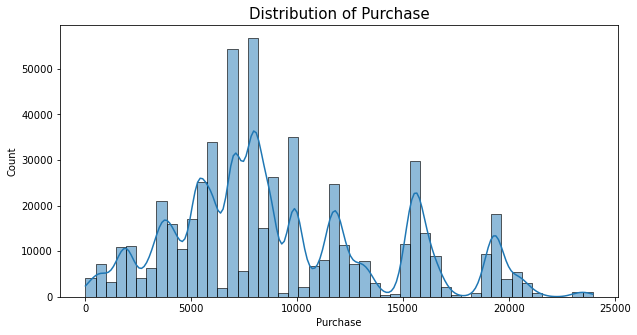

In [78]:
sns.histplot(data=data_copy['Purchase'],kde=True,bins=50)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title("Distribution of Purchase",color='black',size=15)
plt.show()

In [79]:
# Observation:
#     The Distribution of purchase is right skewed distribution

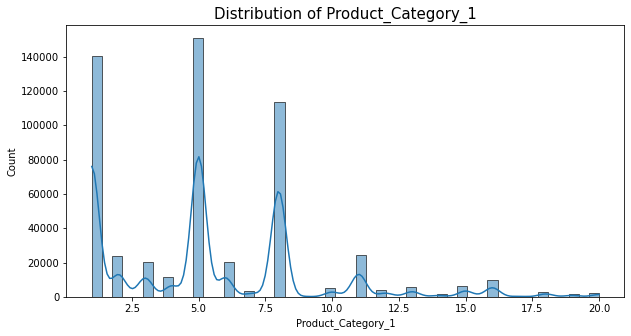

In [80]:
sns.histplot(data=data_copy['Product_Category_1'],kde=True,bins=50)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title("Distribution of Product_Category_1",color='black',size=15)
plt.show()

In [81]:
# Observation:
#     There are lot of null values and skewed data(outliers) which has to be handled

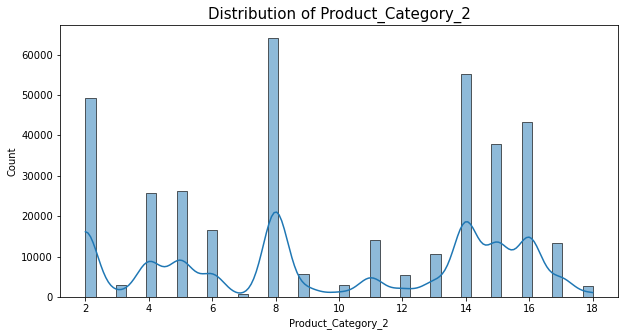

In [82]:
sns.histplot(data=data_copy['Product_Category_2'],kde=True,bins=50)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title("Distribution of Product_Category_2",color='black',size=15)
plt.show()

In [83]:
# Observation:
#     There are lot of null values and skewed data(outliers) which has to be handled

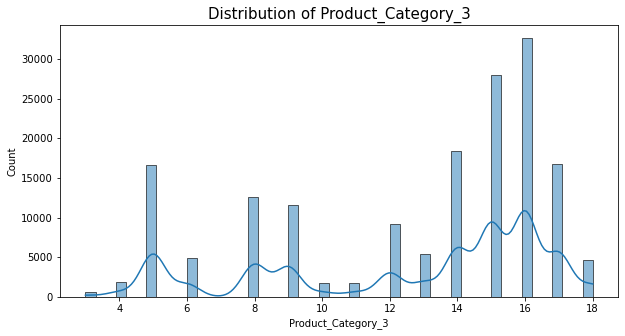

In [84]:
sns.histplot(data=data_copy['Product_Category_3'],kde=True,bins=50)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title("Distribution of Product_Category_3",color='black',size=15)
plt.show()

In [85]:
# Observation:
#     There are lot of null values and skewed data(outliers) which has to be handled
#         It has left skewed distribution

<AxesSubplot:>

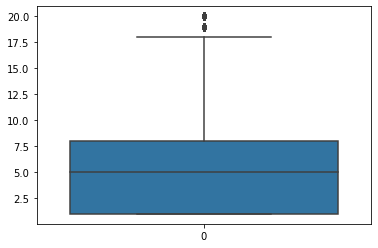

In [86]:
sns.boxplot(data=data_copy['Product_Category_1'])

In [87]:
# Observation:
#     The Product_Category_1 has right skewed data which has some outliers
#     Feature Engineering is required to handle the records

<AxesSubplot:>

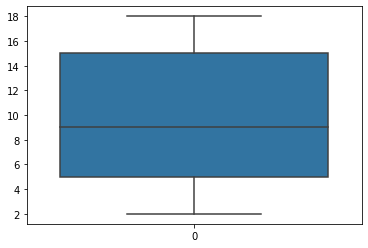

In [88]:
sns.boxplot(data=data_copy['Product_Category_2'])

<AxesSubplot:>

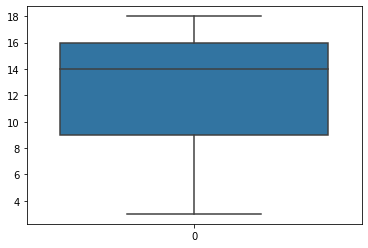

In [89]:
sns.boxplot(data=data_copy['Product_Category_3'])

<AxesSubplot:>

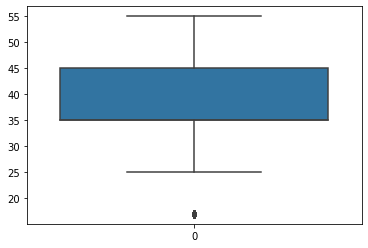

In [90]:
sns.boxplot(data=data_copy['Age'])

In [91]:
# Observation:
#     The Age feature has outlier in the left distribution which has to be preprocessed

<AxesSubplot:>

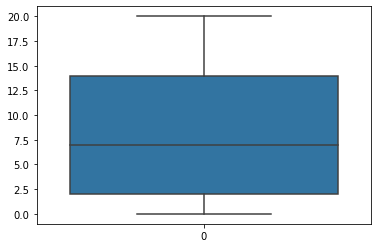

In [92]:
sns.boxplot(data=data_copy['Occupation'])

### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

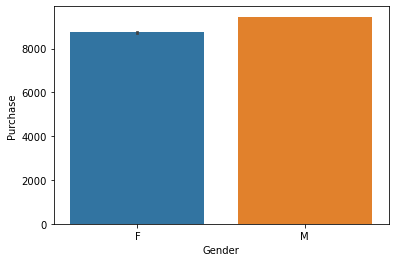

In [93]:
sns.barplot(x='Gender',y='Purchase',data=data_copy)

In [94]:
# Observation:
#     The Maximum number of purchase are made by male Candidates

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

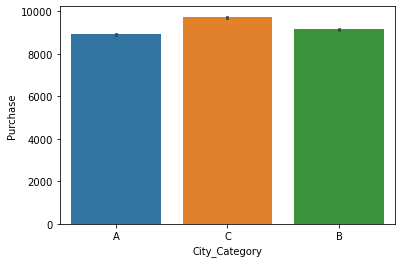

In [95]:
sns.barplot(x='City_Category',y='Purchase',data=data_copy)

In [96]:
# Observation:
#     The Maximum Purchase of the items are transfered from the City Category 'C'

### Multivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

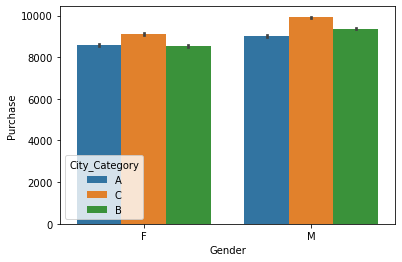

In [97]:
sns.barplot(x='Gender',y='Purchase',hue='City_Category',data=data_copy)

In [98]:
# Observation:
#     It displays the number of purchase of the items which each City Category with Gender Category
#     By Visvalizing the male with C category has the maximum items purchased

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

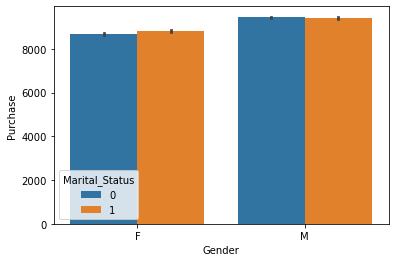

In [99]:
sns.barplot(x='Gender',y='Purchase',hue='Marital_Status',data=data_copy)

In [100]:
# Observation:
#     From the visvalization the Married Male has the maximum number of Pruchase

### Distribution Between the Features

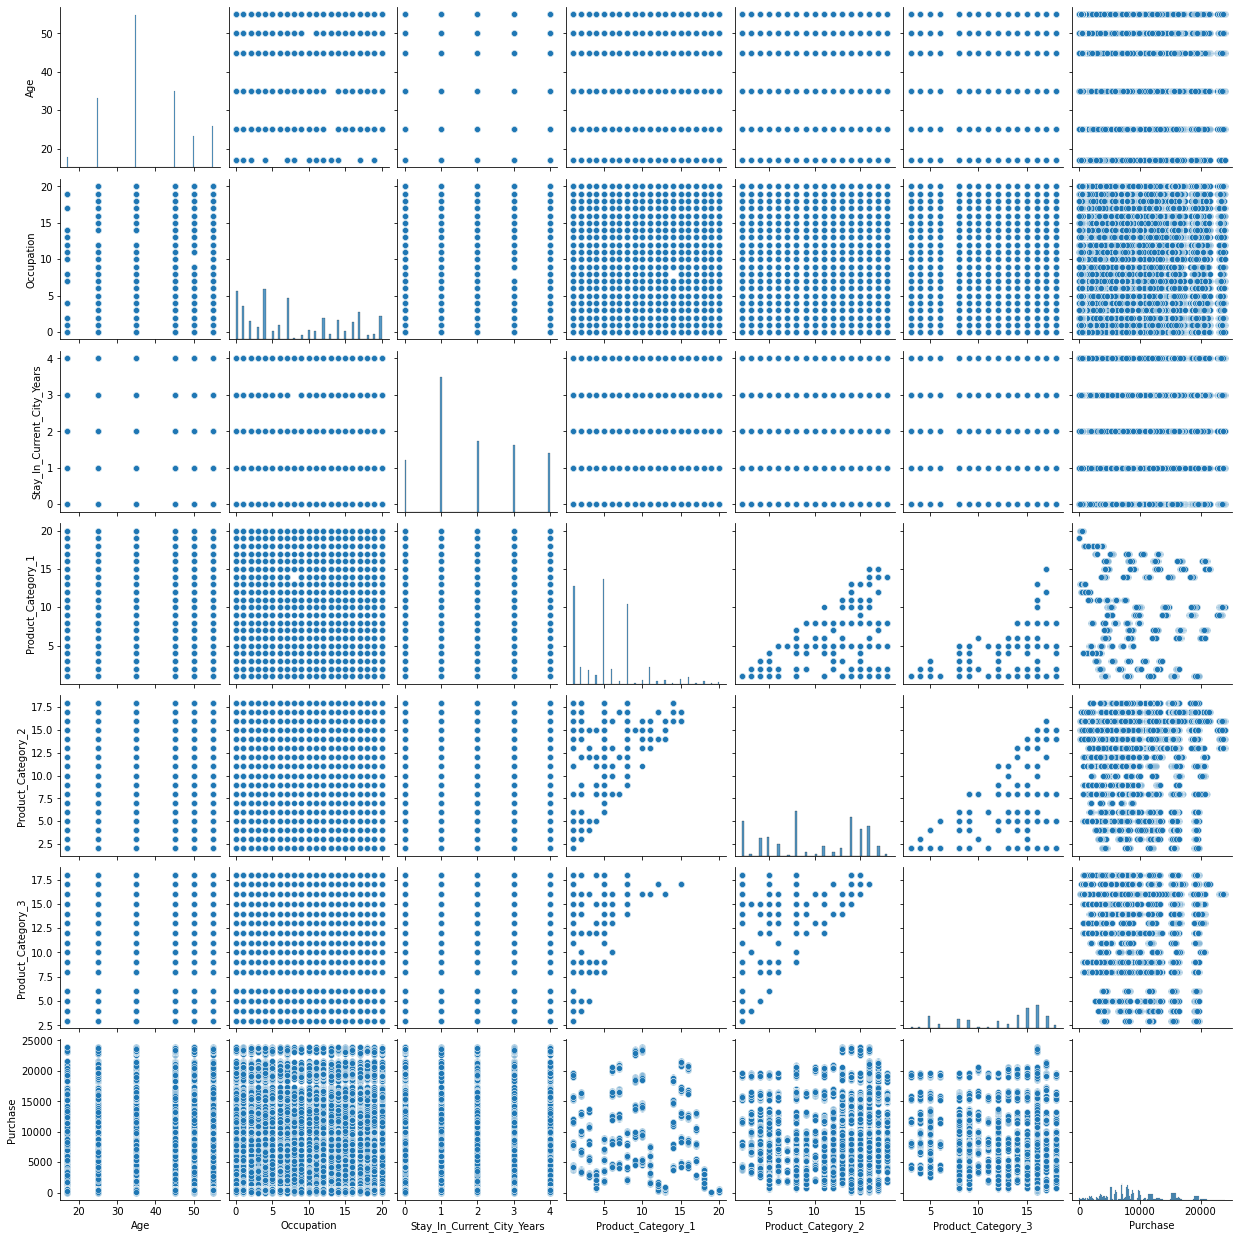

In [101]:
sns.pairplot(data_num,vars=['Age','Occupation','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3','Purchase'])

### Correlation Between the Features

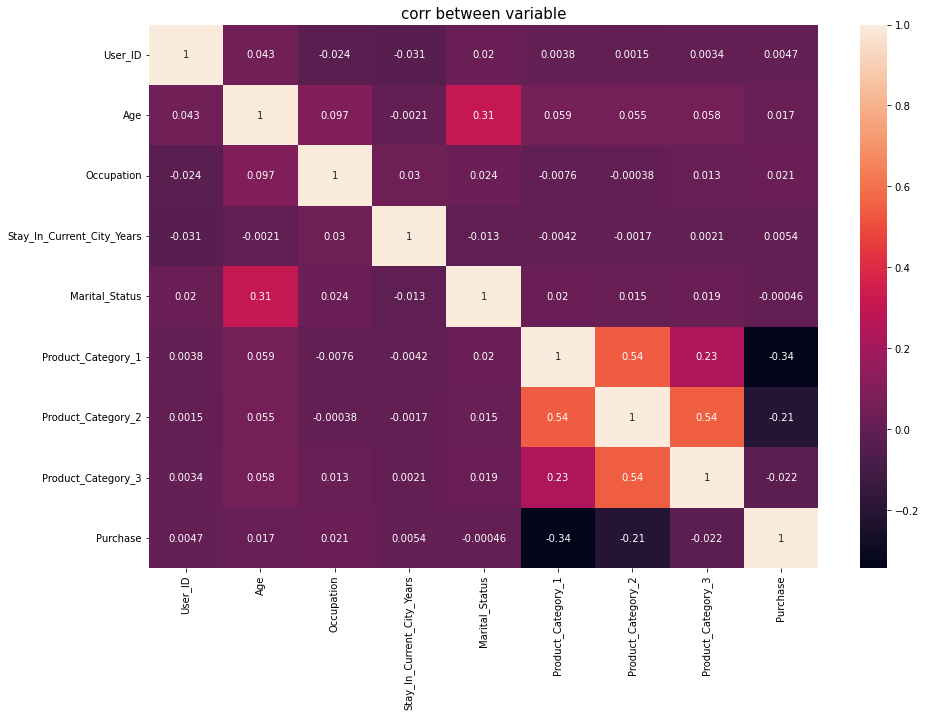

In [102]:
sns.heatmap(data_num.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

### Distribution of the Features

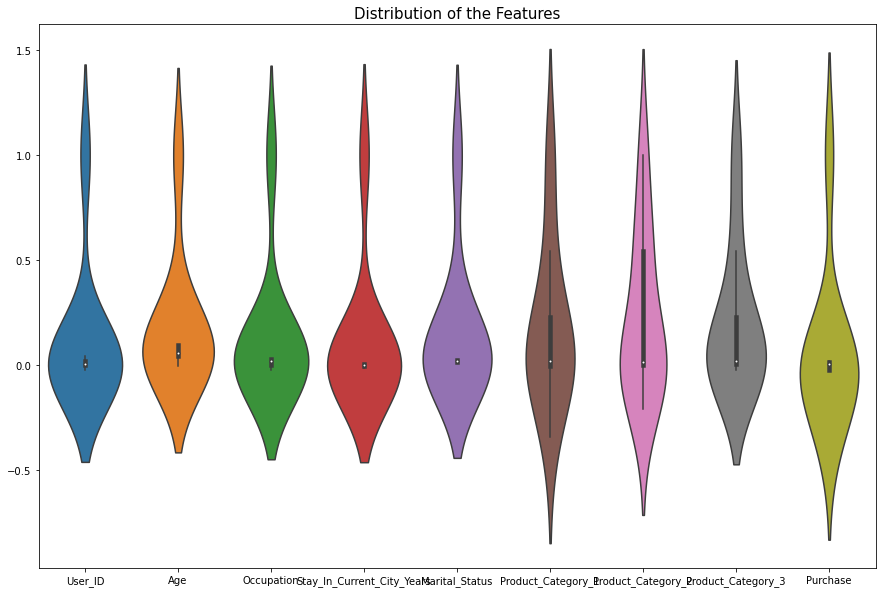

In [103]:
sns.violinplot(data=data_num.corr(),orient="v")
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Distribution of the Features",color='black',size=15)
plt.show()